In [3]:
# Set in root_directory
%cd /home/ronald/PycharmProjects/x-ray-deep-learning/X-ray_Object_Detection/
#%ls    
# libs 
import numpy as np    
from pathlib import Path
import json

np.random.seed(1)

# Directories
ROOT = Path('data/raw')
images_path = ROOT / 'images'
ann_path = ROOT/ 'annotation'
print('Images Path:', images_path)
print('Annotation Path:', ann_path)

# Labels/n_classes
labels = ['gun'] #, 'knife', 'shuriken', 'razor_blade']
n_classes = len(labels) + 1 # count background

# Image Dimenssions
dim = (256, 256, 3)

# Collect all files absolute Path 
imgs_paths = sorted([i.absolute() for i in images_path.glob("*.png") if i.is_file()])

indexes = np.arange(len(imgs_paths))

batch_size = 4
index = 1
# Set batch indexes
# if index 0 and batch 4 in range(0, 17) retrieve values [0 1 2 3]
# if index 1 and batch 4 in range(0, 17) retrieve values [4 5 6 7]
#indexes = indexes[index * batch_size:(index + 1) * batch_size]

#imgs_paths = [imgs_paths[index] for index in indexes]
imgs_name = [img.name for img in imgs_paths]

# Create empty data-set.
X = np.empty((batch_size, *dim), dtype=np.float32)
y = np.empty((batch_size, dim[0], dim[1], n_classes), dtype=np.float32)

/home/ronald/PycharmProjects/x-ray-deep-learning/X-ray_Object_Detection
Images Path: data/raw/images
Annotation Path: data/raw/annotation


In [2]:
# Open imgs annotations
with open("data/raw/annotation/coco_annotation.json", "r") as read_it: 
     ann_data = json.load(read_it)
        


In [65]:
import cv2
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables import Keypoint, KeypointsOnImage
%matplotlib inline
from matplotlib import pyplot as plt
dict_imgs = ann_data.get('images')
dict_ann = ann_data.get('annotations')
dict_cat = ann_data.get('categories')

seq = iaa.Sequential([
    iaa.Fliplr(0.5),# horizontal flips
    # Small gaussian blur with random sigma between 0 and 0.5.
    iaa.GaussianBlur(sigma=(0, 0.5)), 
    # Crop image with random from 0 to 10%    
    # But we only crop about 50% of all images.
    iaa.Sometimes(
        0.5,
       iaa.Crop(percent=(0, 0.1), keep_size=True)),
    # Strengthen or weaken the contrast in each images.
    iaa.LinearContrast((0.75, 1)),

    # Add gaussian noise.
    # For 30% of all images, we sample the noise once per pixel.
    # For the other 30% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05), per_channel=0.3),

    # Apply affine transformations to each images.
    # Scale/zoom them.
    iaa.Affine(
        scale={"x": (1.0, 1.1), "y": (1.0, 1.1)})
], random_order=True) # apply augmenters in random order
 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


KeypointsOnImage([Keypoint(x=3.06371403, y=-1.20597517), Keypoint(x=58.77167892, y=-2.36477304), Keypoint(x=67.51416779, y=93.04292297), Keypoint(x=73.81689453, y=108.10729980), Keypoint(x=81.94944000, y=106.94850159), Keypoint(x=85.40576935, y=58.66525269), Keypoint(x=104.72057343, y=44.75967789), Keypoint(x=140.70710754, y=49.39487076), Keypoint(x=155.14237976, y=67.16310120), Keypoint(x=160.83515930, y=98.45065308), Keypoint(x=154.12580872, y=115.06008148), Keypoint(x=159.81858826, y=124.33047485), Keypoint(x=160.83515930, y=174.15879822), Keypoint(x=202.92111206, y=175.70385742), Keypoint(x=204.14099121, y=193.85835266), Keypoint(x=255.17272949, y=193.47209167), Keypoint(x=253.34291077, y=241.36907959), Keypoint(x=246.63356018, y=251.02572632), Keypoint(x=233.01153564, y=255.66090393), Keypoint(x=228.13201904, y=245.61799622), Keypoint(x=161.64842224, y=242.14160156), Keypoint(x=157.17552185, y=252.18450928), Keypoint(x=115.69952393, y=254.88838196), Keypoint(x=98.21453857, y=261.0

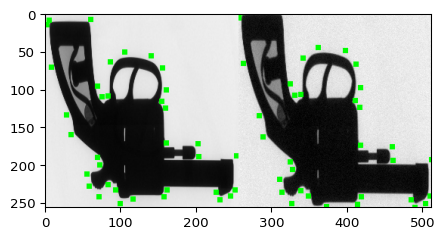

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


KeypointsOnImage([Keypoint(x=261.86477661, y=-0.45710450), Keypoint(x=202.17568970, y=-1.60918593), Keypoint(x=192.80842590, y=93.24553680), Keypoint(x=186.05526733, y=108.22259521), Keypoint(x=177.34155273, y=107.07051086), Keypoint(x=173.63819885, y=59.06711578), Keypoint(x=152.94306946, y=45.24213409), Keypoint(x=114.38479614, y=49.85046387), Keypoint(x=98.91790771, y=67.51570892), Keypoint(x=92.81829071, y=98.62191772), Keypoint(x=100.00712585, y=115.13508606), Keypoint(x=93.90750885, y=124.35173798), Keypoint(x=92.81829071, y=173.89126587), Keypoint(x=47.72468948, y=175.42736816), Keypoint(x=46.41762543, y=193.47665405), Keypoint(x=-8.26105785, y=193.09262085), Keypoint(x=-6.30047846, y=240.71199036), Keypoint(x=0.88835555, y=250.31266785), Keypoint(x=15.48386765, y=254.92098999), Keypoint(x=20.71210670, y=244.93629456), Keypoint(x=91.94691467, y=241.48004150), Keypoint(x=96.73946381, y=251.46475220), Keypoint(x=141.17951965, y=254.15293884), Keypoint(x=159.91406250, y=260.2973938

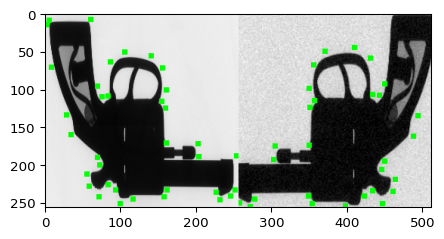

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


KeypointsOnImage([Keypoint(x=-6.42497873, y=-0.54461902), Keypoint(x=53.51390839, y=-1.69748533), Keypoint(x=62.92037201, y=93.22185516), Keypoint(x=69.70178223, y=108.20912170), Keypoint(x=78.45198059, y=107.05625153), Keypoint(x=82.17081451, y=59.02015305), Keypoint(x=102.95254517, y=45.18575287), Keypoint(x=141.67218018, y=49.79722214), Keypoint(x=157.20379639, y=67.47450256), Keypoint(x=163.32893372, y=98.60190582), Keypoint(x=156.11001587, y=115.12631989), Keypoint(x=162.23515320, y=124.34925842), Keypoint(x=163.32893372, y=173.92251587), Keypoint(x=208.61123657, y=175.45967102), Keypoint(x=209.92376709, y=193.52125549), Keypoint(x=264.83126831, y=193.13696289), Keypoint(x=262.86248779, y=240.78878784), Keypoint(x=255.64356995, y=250.39599609), Keypoint(x=240.98698425, y=255.00746155), Keypoint(x=235.73686218, y=245.01596069), Keypoint(x=164.20396423, y=241.55735779), Keypoint(x=159.39135742, y=251.54885864), Keypoint(x=114.76531982, y=254.23889160), Keypoint(x=95.95238495, y=260.

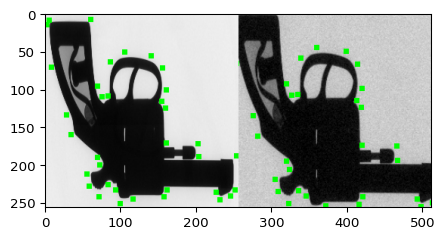

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


KeypointsOnImage([Keypoint(x=254.86378050, y=8.83361435), Keypoint(x=198.29636383, y=7.76485729), Keypoint(x=189.41899872, y=95.75916290), Keypoint(x=183.01903534, y=109.65300751), Keypoint(x=174.76102448, y=108.58425140), Keypoint(x=171.25136566, y=64.05271912), Keypoint(x=151.63857269, y=51.22763443), Keypoint(x=115.09686279, y=55.50266266), Keypoint(x=100.43887329, y=71.89026642), Keypoint(x=94.65826416, y=100.74669647), Keypoint(x=101.47113037, y=116.06554413), Keypoint(x=95.69052124, y=124.61560059), Keypoint(x=94.65826416, y=170.57215881), Keypoint(x=51.92301941, y=171.99716187), Keypoint(x=50.68431091, y=188.74101257), Keypoint(x=-1.13473511, y=188.38476562), Keypoint(x=0.72331238, y=232.56004333), Keypoint(x=7.53617859, y=241.46635437), Keypoint(x=21.36836243, y=245.74137878), Keypoint(x=26.32316589, y=236.47882080), Keypoint(x=93.83245850, y=233.27255249), Keypoint(x=98.37435913, y=242.53509521), Keypoint(x=140.49024963, y=245.02886963), Keypoint(x=158.24498749, y=250.72891235

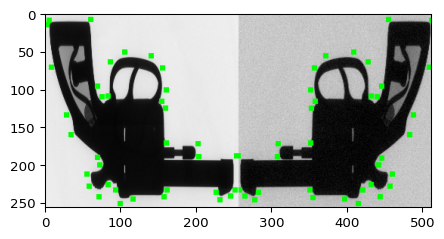

In [67]:
def search_array(array, key, value):
    return next((obj for obj in array if obj[key] == value), None) # return object

def get_img_seg_kps(img_seg):
    points = list()
    for i in range(0, len(img_seg), 2): # iterate every two steps
        chunk = img_seg[i:i+2]
        points.append(Keypoint(x=chunk[0], y=chunk[1]))
    
    return points

def get_img_info(img_name):
    """
    return img_label and segmentation points of the image
    """
    img_seg, label = None, None
    img_obj = search_array(dict_imgs, 'file_name', img_name)
    if img_obj is not None:
        ann_obj = search_array(dict_ann, 'image_id', str(img_obj['id']))
        if ann_obj is not None:
            kps = get_img_seg_kps(ann_obj['segmentation'])
            label = search_array(dict_cat, 'id', ann_obj['category_id'])
            return label['name'], kps
    
    return None

def get_augimg(img, img_info):
    label, points = img_info
    kps = KeypointsOnImage(points, shape=img.shape)
    if img.shape != dim:
        img = ia.imresize_single_image(img, dim[0:2])
        kps = kps.on(img)
    # Augment keypoints and images.
    seq_det = seq.to_deterministic()
    img_aug = seq_det.augment_images([img])[0]
    kps_aug = seq_det.augment_keypoints([kps])[0]
#     img_aug, kps_aug = seq(image=img, keypoints=kps)
    aug_points = [[kp.x, kp.y] for kp in kps_aug.keypoints]
    aug_points_dic = {'label': label, 'points': aug_points}
    ia.imshow(np.hstack([
        kps.draw_on_image(img, size=7),
        kps_aug.draw_on_image(img_aug, size=7)]))

    return img_aug, aug_points_dic
    
def show(img):
    print(img.shape)
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

def get_mask(img, imgaug_shape):
    blank = np.zeros(shape=(img.shape[0], img.shape[1]), dtype=np.float32)
    points = np.array(imgaug_shape['points'], dtype=np.int32)
    label = imgaug_shape['label']
    cv2.fillPoly(blank, [points], 255)
    blank = blank / 255.0
#     ia.imshow(img)
#     ia.imshow(blank)
    return np.expand_dims(blank, axis=2)

    
def data_generation(img_path):
    X = np.empty((batch_size, *dim), dtype=np.float32)
    y = np.empty((batch_size, dim[0], dim[1], n_classes), dtype=np.float32)    
    
    # retrieve img in gray_scale as numpy
    img = cv2.imread(str(img_path)) # our images are gray_scale
    img = (img / 255.0).astype(np.float32)
    images = [np.copy(img) for _ in range(batch_size)]
    for i, image in enumerate(images):
        img_info = get_img_info(img_path.name)
        imgaug, imgaug_shape = get_augimg(img, img_info)
        imgaug_mask = get_mask(imgaug, imgaug_shape)
        X[i,] = imgaug
        y[i,] = imgaug_mask
    
    return X, y
    
img_pol = data_generation(imgs_paths[index])
#print(img_pol)